In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('flats.csv')
df.head()

,price,dist1,dist2,dist3,rooms,square,floor,type1,type2,type3,metro
0,26 000 грн,ЖК Місце мрії,Шулявка,Солом'янський,2 кімнати,60 / 35 / 15 м²,поверх 14 з 25,спец. проект,монолітно-каркасний,2009.0,1
1,95 750 грн,ЖК Central Park,Нова забудова,Печерський,3 кімнати,131 / 80 / 15 м²,поверх 10 з 25,NaN,NaN,NaN,1
2,57 450 грн,ЖК Новопечерські Липки,Чорна Гора,Печерський,2 кімнати,87 / 41 / 17 м²,поверх 2 з 23,спец. проект,монолітно-каркасний,2013.0,1
3,8 000 грн,Харьківський,Дарницький,Київ,1 кімната,40 / 18 / 9 м²,поверх 3 з 16,серія Т,утеплена панель,1983.0,1
4,15 000 грн,ЖМ Патріотика,Осокорки,Дарницький,1 кімната,38 / 12 / 16 м²,поверх 15 з 25,спец. проект,панельні,2018.0,1


## Data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17748 entries, 0 to 17747
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   17748 non-null  object
 1   dist1   17748 non-null  object
 2   dist2   17639 non-null  object
 3   dist3   16614 non-null  object
 4   rooms   17748 non-null  object
 5   square  17748 non-null  object
 6   floor   17748 non-null  object
 7   type1   15045 non-null  object
 8   type2   13784 non-null  object
 9   type3   14578 non-null  object
 10  metro   17748 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.5+ MB


## Duplicates

In [4]:
df[df.duplicated(subset=['price', 'dist1', 'dist2', 'dist3', 'rooms', 'square', 'floor', 'type1', 'type2', 'type3'])]

,price,dist1,dist2,dist3,rooms,square,floor,type1,type2,type3,metro
8780,38 000 грн,ЖК Французький квартал 2,Нова забудова,Печерський,2 кімнати,64 / 28 / 24 м²,поверх 8 з 24,спец. проект,монолітно-каркасний,2017.0,1
8783,28 725 грн,ЖК Французький квартал 2,Нова забудова,Печерський,1 кімната,41 / 20 / 20 м²,поверх 14 з 24,спец. проект,монолітно-каркасний,2017.0,1
8792,17 000 грн,Липки,Печерський,Київ,1 кімната,40 / 20 / 5 м²,поверх 1 з 5,сталінка,цегляний будинок,1962.0,1
8820,24 000 грн,ЖК Нивки-Парк,Ґалаґани,Святошинський,2 кімнати,72 / 40 / 20 м²,поверх 9 з 18,спец. проект,монолітно-каркасний,2021.0,1
8831,19 900 грн,Нижній Печерськ,Печерський,Київ,2 кімнати,52 / 20 / 25 м²,поверх 17 з 18,совмін,цегляний будинок,1974.0,1
...,...,...,...,...,...,...,...,...,...,...,...
12028,42 130 грн,Поділ,Подільський,Київ,3 кімнати,75 / - / 12 м²,поверх 3 з 4,дореволюційний,цегляний будинок,1917.0,1
12029,107 240 грн,ЖК Crystal Park,Шулявка,Шевченківський,4 кімнати,160 / - / 37 м²,поверх 8 з 9,спец. проект,монолітно-каркасний,2013.0,1
12054,16 000 грн,"ЖК вул. Каховська, 60",Микільська Слобідка,Дніпровський,1 кімната,31 / 15 / 12 м²,поверх 5 з 26,цегляний будинок,2020,сьогодні о 10:24,0
12559,19 000 грн,"ЖК вул. Дмитрівська, 69",Солдатська слобідка,Шевченківський,1 кімната,55 / - / 15 м²,поверх 8 з 24,спец. проект,монолітно-каркасний,вчора о 13:30,0


In [5]:
df.drop_duplicates(subset=['price', 'dist1', 'dist2', 'dist3', 'rooms', 'square', 'floor', 'type1', 'type2', 'type3'],
                   inplace=True, ignore_index=True)

## Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   15547 non-null  object
 1   dist1   15547 non-null  object
 2   dist2   15453 non-null  object
 3   dist3   14504 non-null  object
 4   rooms   15547 non-null  object
 5   square  15547 non-null  object
 6   floor   15547 non-null  object
 7   type1   13101 non-null  object
 8   type2   11979 non-null  object
 9   type3   12855 non-null  object
 10  metro   15547 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.3+ MB


In [7]:
df.dist3.value_counts()

dist3
Київ              7518
Печерський        2357
Голосіївський     1165
Дарницький         934
Шевченківський     768
Солом'янський      464
Дніпровський       449
Оболонський        303
Подільський        291
Святошинський      193
Деснянський         62
Name: count, dtype: int64

In [8]:
df.dist3 = df.dist3.apply(lambda x : np.nan if x=='Київ' else x)

In [9]:
districts = ['Печерський', 'Деснянський', 'Шевченківський', 'Дніпровський', 'Голосіївський',
             "Солом'янський", 'Святошинський', 'Оболонський', 'Дарницький', 'Подільський']

In [10]:
for i in range(0, len(df)):
    if df.dist1[i] in districts:
        df.loc[i, 'dist3'] = df.dist1[i]
        df.loc[i, 'dist1'] = np.nan
    elif df.dist2[i] in districts:
        df.loc[i, 'dist3'] = df.dist2[i]
        df.loc[i, 'dist2'] = np.nan
        

In [11]:
import re
pattern = r'\d{4}'
for i in range(0, len(df)):
    if re.match(pattern, str(df.type1[i])):
        df.loc[i, 'type3'] = df.type1[i]
        df.loc[i, 'type1'] = np.nan
    elif re.match(pattern, str(df.type2[i])):
        df.loc[i, 'type3'] = df.type2[i]
        df.loc[i, 'type2'] = np.nan
    

In [12]:
df.head()

,price,dist1,dist2,dist3,rooms,square,floor,type1,type2,type3,metro
0,26 000 грн,ЖК Місце мрії,Шулявка,Солом'янський,2 кімнати,60 / 35 / 15 м²,поверх 14 з 25,спец. проект,монолітно-каркасний,2009.0,1
1,95 750 грн,ЖК Central Park,Нова забудова,Печерський,3 кімнати,131 / 80 / 15 м²,поверх 10 з 25,NaN,NaN,NaN,1
2,57 450 грн,ЖК Новопечерські Липки,Чорна Гора,Печерський,2 кімнати,87 / 41 / 17 м²,поверх 2 з 23,спец. проект,монолітно-каркасний,2013.0,1
3,8 000 грн,Харьківський,NaN,Дарницький,1 кімната,40 / 18 / 9 м²,поверх 3 з 16,серія Т,утеплена панель,1983.0,1
4,15 000 грн,ЖМ Патріотика,Осокорки,Дарницький,1 кімната,38 / 12 / 16 м²,поверх 15 з 25,спец. проект,панельні,2018.0,1


In [13]:
df.price =df.price.apply(lambda x:  x.replace(' ', ''))
df.price.replace('[^0-9]', '', regex=True, inplace=True)
df.price = df.price.astype('int32')

In [14]:
df.rooms.unique()

array(['2 кімнати', '3 кімнати', '1 кімната', '4 кімнати', '6 кімнат',
       '5 кімнат'], dtype=object)

In [15]:
df['rooms'].replace('[^0-9]', '', regex=True, inplace=True)
df['rooms'] = df.rooms.astype('int32')

In [16]:
df['square'].replace('м²', '', inplace=True, regex=True)

str_split = df.square.str.split(' / ')

df['total_area'] = pd.to_numeric(str_split.str.get(0), errors='coerce') 
df['living_area'] = pd.to_numeric(str_split.str.get(1), errors='coerce')
df['kitchen_area']= pd.to_numeric(str_split.str.get(2), errors='coerce')
df.head()

,price,dist1,dist2,dist3,rooms,square,floor,type1,type2,type3,metro,total_area,living_area,kitchen_area
0,26000,ЖК Місце мрії,Шулявка,Солом'янський,2,60 / 35 / 15,поверх 14 з 25,спец. проект,монолітно-каркасний,2009.0,1,60.0,35.0,15.0
1,95750,ЖК Central Park,Нова забудова,Печерський,3,131 / 80 / 15,поверх 10 з 25,NaN,NaN,NaN,1,131.0,80.0,15.0
2,57450,ЖК Новопечерські Липки,Чорна Гора,Печерський,2,87 / 41 / 17,поверх 2 з 23,спец. проект,монолітно-каркасний,2013.0,1,87.0,41.0,17.0
3,8000,Харьківський,NaN,Дарницький,1,40 / 18 / 9,поверх 3 з 16,серія Т,утеплена панель,1983.0,1,40.0,18.0,9.0
4,15000,ЖМ Патріотика,Осокорки,Дарницький,1,38 / 12 / 16,поверх 15 з 25,спец. проект,панельні,2018.0,1,38.0,12.0,16.0


In [17]:
df['floor'].replace('поверх', '', regex=True, inplace=True)

str_split = df.floor.str.split(' з ')

df['floor'] = pd.to_numeric(str_split.str.get(0), errors='coerce', downcast='integer') 
df['floor_total'] =  pd.to_numeric(str_split.str.get(1), errors='coerce', downcast='integer')
df.rename(columns= {'type3' :'year'}, inplace = True)

### Summary statistics for numeric features

In [18]:
df.describe()

,price,rooms,floor,metro,total_area,living_area,kitchen_area,floor_total
count,1.554700e+04,15547.000000,15545.000000,15547.000000,15547.000000,10341.000000,15299.000000,15395.000000
mean,3.860003e+04,2.201454,9.108331,0.361613,80.345475,43.986152,16.019678,16.322312
std,1.090642e+05,1.040572,6.488120,0.480483,57.452965,33.737807,10.552373,8.281375
min,9.990000e+02,1.000000,1.000000,0.000000,9.000000,1.000000,1.000000,1.000000
25%,1.300000e+04,1.000000,4.000000,0.000000,46.000000,20.000000,9.000000,9.000000
50%,2.300000e+04,2.000000,7.000000,0.000000,63.000000,35.000000,14.000000,16.000000
75%,4.580300e+04,3.000000,13.000000,1.000000,97.000000,55.000000,20.000000,24.000000
max,1.129850e+07,6.000000,53.000000,1.000000,1800.000000,706.000000,210.000000,48.000000


<Axes: title={'center': 'price'}>

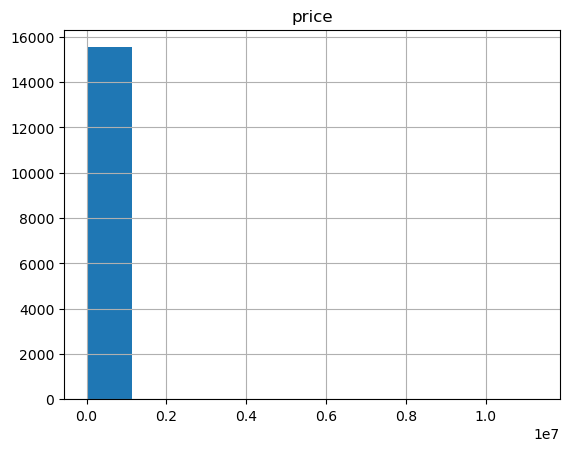

In [19]:
plt.title('price')
df['price'].hist(bins=10)

<Axes: >

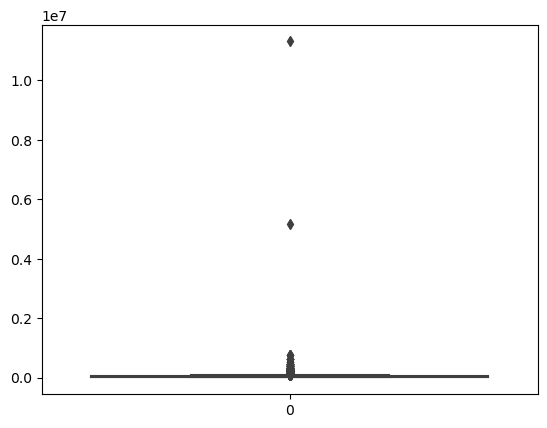

In [20]:
sns.boxplot(df.price)

<Axes: >

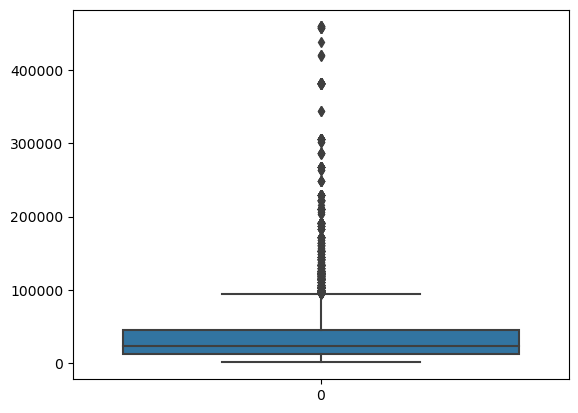

In [21]:
df = df[df.price<500000]
sns.boxplot(df.price)

<Axes: title={'center': 'price'}>

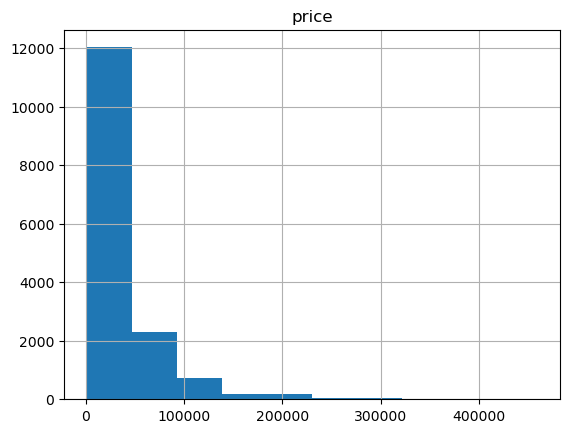

In [22]:
plt.title('price')
df['price'].hist(bins=10)

<Axes: >

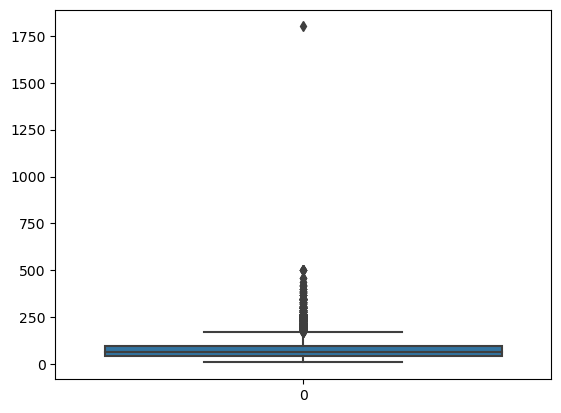

In [23]:
sns.boxplot(df.total_area)

<Axes: >

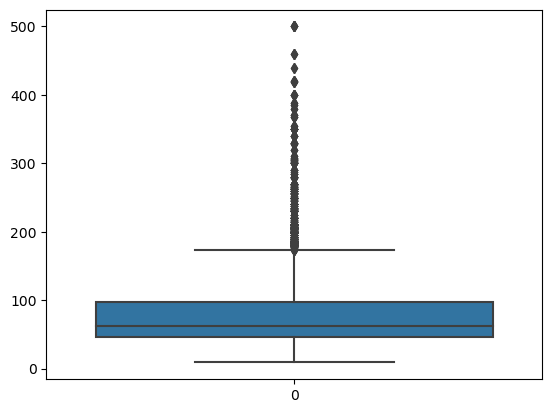

In [24]:
df = df[df.total_area <600]
sns.boxplot(df.total_area)

In [25]:
df.year = pd.to_numeric(df.year, errors='coerce', downcast='integer') 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15532 entries, 0 to 15546
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         15532 non-null  int32  
 1   dist1         14730 non-null  object 
 2   dist2         8014 non-null   object 
 3   dist3         15198 non-null  object 
 4   rooms         15532 non-null  int32  
 5   square        15532 non-null  object 
 6   floor         15530 non-null  float64
 7   type1         12898 non-null  object 
 8   type2         11474 non-null  object 
 9   year          7812 non-null   float64
 10  metro         15532 non-null  int64  
 11  total_area    15532 non-null  float64
 12  living_area   10332 non-null  float64
 13  kitchen_area  15284 non-null  float64
 14  floor_total   15380 non-null  float64
dtypes: float64(6), int32(2), int64(1), object(6)
memory usage: 2.3+ MB


### Null values

In [27]:
df.isna().sum()

price              0
dist1            802
dist2           7518
dist3            334
rooms              0
square             0
floor              2
type1           2634
type2           4058
year            7720
metro              0
total_area         0
living_area     5200
kitchen_area     248
floor_total      152
dtype: int64

In [28]:
df.dropna(subset = ['dist3', 'floor'], inplace=True, ignore_index=True)

In [29]:
df.drop(['dist1', 'dist2', 'square', 'type1', 'type2'], axis = 1, inplace=True)

In [30]:
df.rename(columns= {'dist3': 'district'}, inplace = True)

## Train test split

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15196 entries, 0 to 15195
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         15196 non-null  int32  
 1   district      15196 non-null  object 
 2   rooms         15196 non-null  int32  
 3   floor         15196 non-null  float64
 4   year          7700 non-null   float64
 5   metro         15196 non-null  int64  
 6   total_area    15196 non-null  float64
 7   living_area   10089 non-null  float64
 8   kitchen_area  14950 non-null  float64
 9   floor_total   15046 non-null  float64
dtypes: float64(6), int32(2), int64(1), object(1)
memory usage: 1.0+ MB


In [32]:
df.drop(['living_area', 'year'], axis = 1, inplace = True)

In [33]:
df.to_csv('flats_cleaned.csv', index=False)

In [33]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=4)

## EDA

### Target feature

<Axes: title={'center': 'price'}>

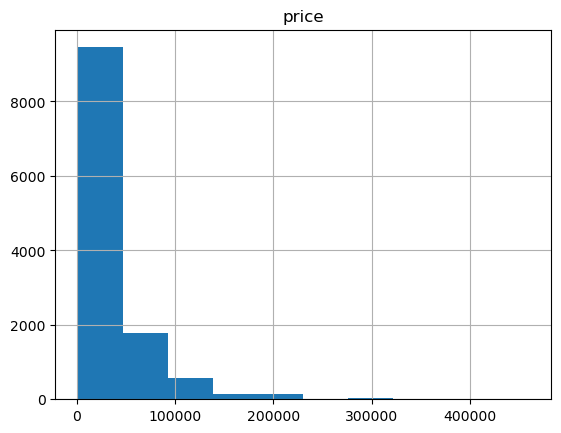

In [34]:
plt.title('price')
df_train['price'].hist(bins=10)

In [35]:
categorical = ['district', 'metro']
numerical = ['rooms', 'floor', 'total_area', 'kitchen_area', 'floor_total']

### Categorical features

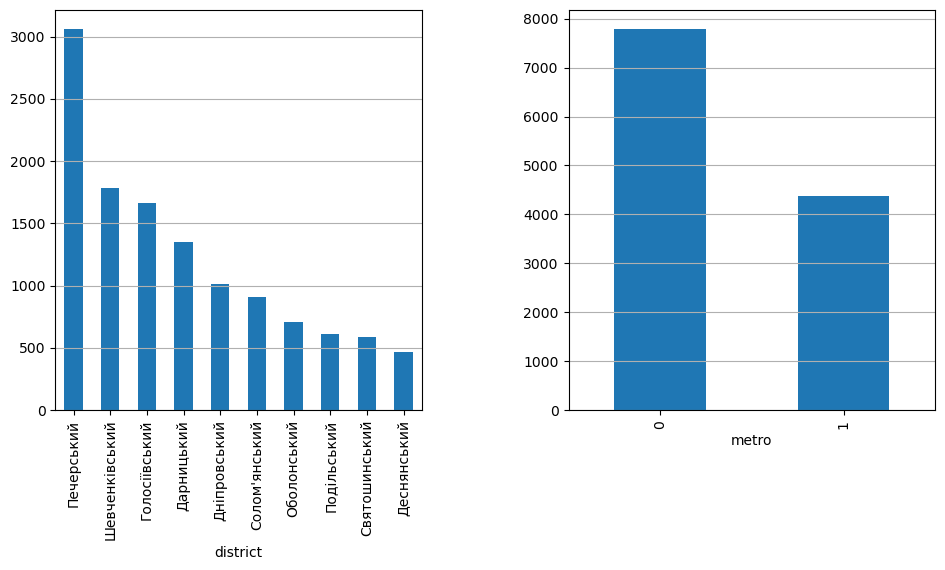

In [36]:
plt.figure(figsize=(11, 5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for i in range(0, len(categorical)):
    plt.subplot(1, 2, i+1)
    df_train[categorical[i]].value_counts().plot.bar()
    plt.grid(axis='y')

### Numerical features

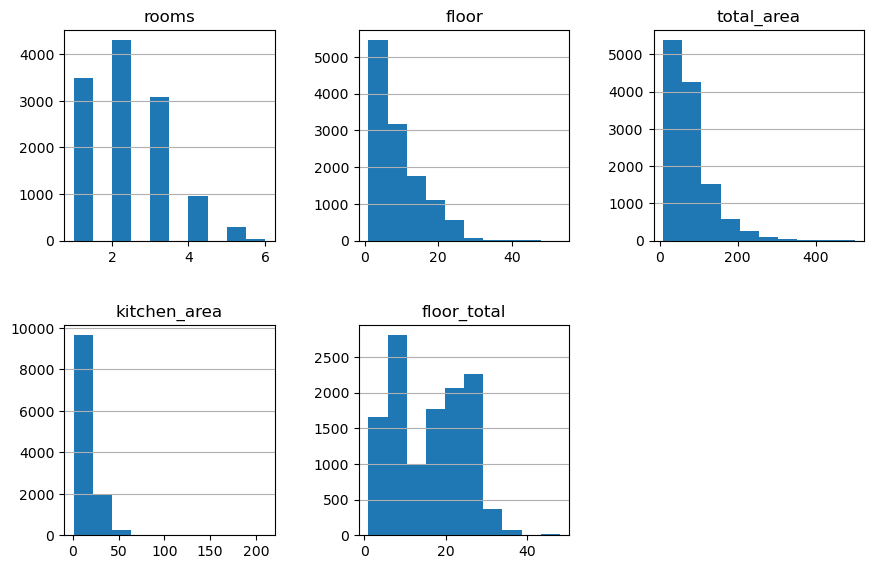

In [37]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for i in range(0, len(numerical)):
    plt.subplot(3, 3, i+1)
    plt.title(numerical[i])
    df_train[numerical[i]].hist()
    
    plt.grid(axis='x')

## Features dependencies

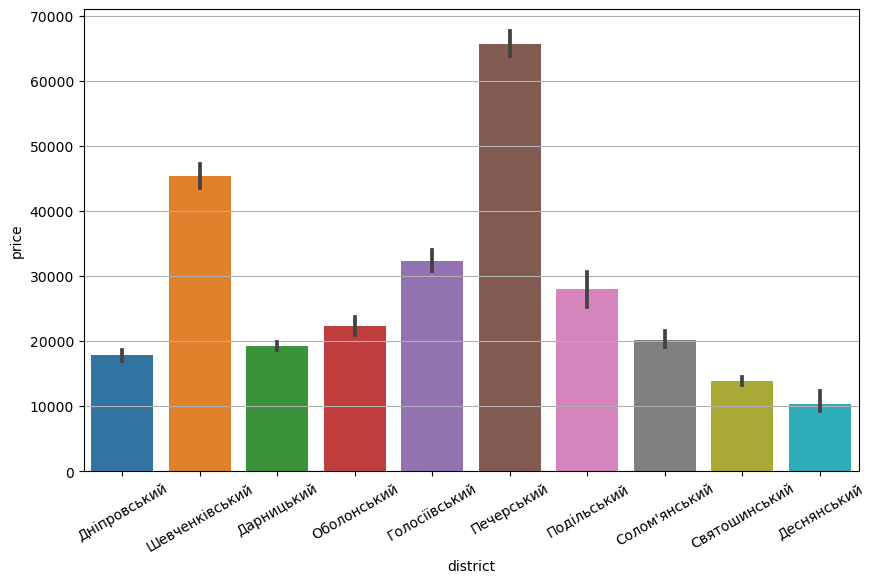

In [38]:
plt.figure(figsize = (10, 6))
g = sns.barplot(x='district', y='price', data=df_train)
plt.grid(axis='y')
ticks = plt.xticks(rotation=30)

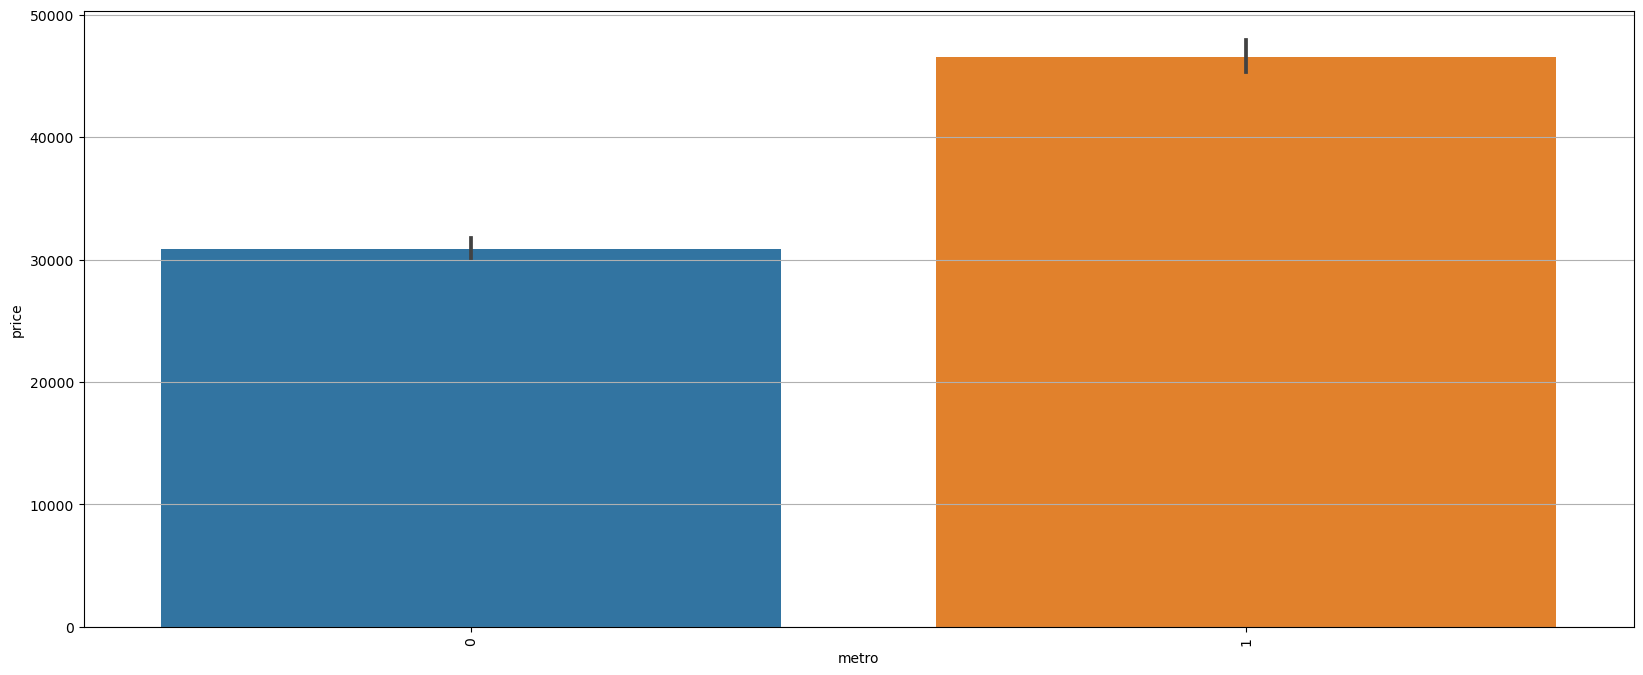

In [39]:
plt.figure(figsize=(20, 8))
plt.grid(axis='y')
sns.barplot(x='metro', y= 'price', data=df_train)

ticks = plt.xticks(rotation=90)

<Axes: xlabel='price', ylabel='total_area'>

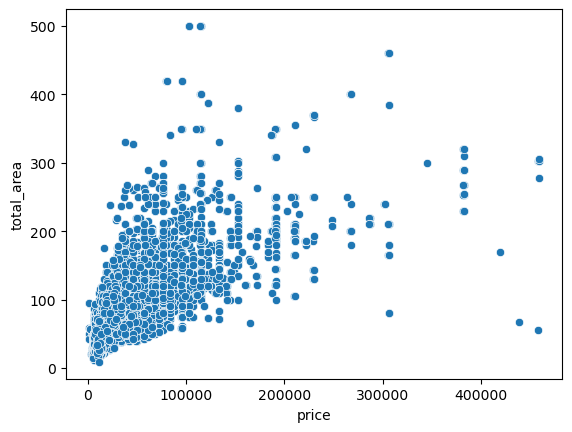

In [40]:
sns.scatterplot(x=df_train.price, y =df_train.total_area)

### Feature importance

In [41]:
from sklearn.metrics import mutual_info_score
def mutual_info(series):
    return mutual_info_score(series, df_train.price)

In [42]:
mi = df_train[categorical].apply(mutual_info)
mi.sort_values(ascending=False)

district    0.473825
metro       0.114517
dtype: float64

### Correlation

<Axes: >

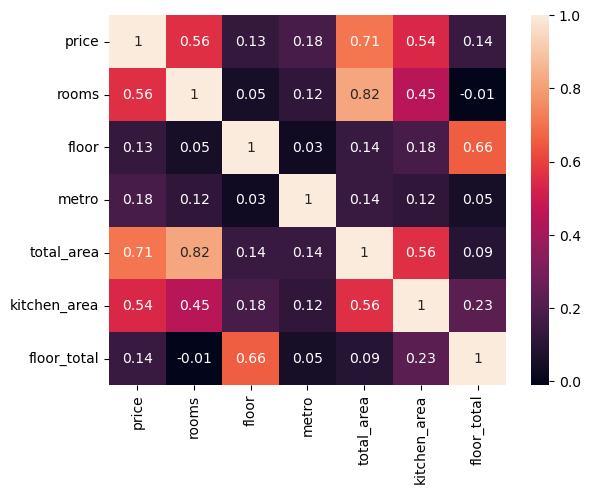

In [43]:
corr_matrix = df_train.corr(numeric_only=True).round(2)
sns.heatmap(corr_matrix, annot=True)

## Fearures preprocessing 

### X y split

In [44]:
y_train= df_train['price']
y_test =df_test['price']

X_train = df_train.drop(['price'], axis=1)
X_test = df_test.drop(['price'], axis=1)

### Pipeline

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer
imputer = KNNImputer(n_neighbors=3)
scaler = StandardScaler()
pipe_num = Pipeline([('imputer', imputer), ('scaler' , scaler)])
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [46]:
col_transformer = ColumnTransformer([('num_preproc', pipe_num ,np.arange(1,7)), ('cat_preproc', encoder, [0])])

In [47]:
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

In [48]:
y_train = np.log(y_train)
y_test = np.log(y_test)

## Models training

In [49]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
val_results = pd.DataFrame(columns=['model', 'params', 'r2', 'train_r2'])

### Lasso regression

In [50]:
from sklearn.linear_model import Lasso
params = {'alpha': [0.0001, 0.001, 0.01, 0.1]}
ls = Lasso(random_state=4)

grid = GridSearchCV(ls, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

y_pred = grid.best_estimator_.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2_train= grid.best_score_

In [51]:
val_results.loc[len(val_results)] = ['Lasso Regression', grid.best_params_, r2, r2_train]
val_results

,model,params,r2,train_r2
0,Lasso Regression,{'alpha': 0.0001},0.743437,0.742944


### Ridge regression

In [52]:
from sklearn.linear_model import Ridge
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 1.5]}
rd = Ridge(random_state=4)

grid = GridSearchCV(rd, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

y_pred = grid.best_estimator_.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2_train= grid.best_score_

In [53]:
val_results.loc[len(val_results)] = ['Ridge Regression', grid.best_params_, r2, r2_train]
val_results

,model,params,r2,train_r2
0,Lasso Regression,{'alpha': 0.0001},0.743437,0.742944
1,Ridge Regression,{'alpha': 1},0.743419,0.742947


### Desision Tree Regression

In [54]:
from sklearn.tree import DecisionTreeRegressor
params = {    'max_depth': range (6, 21, 2),
              'min_samples_leaf': range (2,8),
              'min_samples_split': range (2,10,2) }
dt = DecisionTreeRegressor()

grid = GridSearchCV(dt, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

y_pred = grid.best_estimator_.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2_train= grid.best_score_

In [55]:
val_results.loc[len(val_results)] = ['DecisionTree Regression', grid.best_params_, r2, r2_train]
val_results

,model,params,r2,train_r2
0,Lasso Regression,{'alpha': 0.0001},0.743437,0.742944
1,Ridge Regression,{'alpha': 1},0.743419,0.742947
2,DecisionTree Regression,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.861405,0.829188


### Random forest

In [56]:
from sklearn.ensemble import RandomForestRegressor
params = { 'n_estimators': range (60, 200, 10),
              'max_depth': range (6, 13, 1) }
rf = RandomForestRegressor(random_state=4)

grid = GridSearchCV(rf, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

y_pred = grid.best_estimator_.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2_train= grid.best_score_

In [57]:
val_results.loc[len(val_results)] = ['RandomForestRegressor', grid.best_params_, r2, r2_train]
val_results

,model,params,r2,train_r2
0,Lasso Regression,{'alpha': 0.0001},0.743437,0.742944
1,Ridge Regression,{'alpha': 1},0.743419,0.742947
2,DecisionTree Regression,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.861405,0.829188
3,RandomForestRegressor,"{'max_depth': 12, 'n_estimators': 130}",0.876345,0.864629


#### Gradient Boosting

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
params = { 'learning_rate': [0.01, 0.1, 1],
            'n_estimators': range (250, 351, 50),
            'max_depth': range (9, 13) }
gb = GradientBoostingRegressor(random_state=4)

grid = GridSearchCV(gb, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

y_pred = grid.best_estimator_.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2_train= grid.best_score_

In [59]:
val_results.loc[len(val_results)] = ['GradientBoosting Regression', grid.best_params_, r2, r2_train]
val_results

,model,params,r2,train_r2
0,Lasso Regression,{'alpha': 0.0001},0.743437,0.742944
1,Ridge Regression,{'alpha': 1},0.743419,0.742947
2,DecisionTree Regression,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.861405,0.829188
3,RandomForestRegressor,"{'max_depth': 12, 'n_estimators': 130}",0.876345,0.864629
4,GradientBoosting Regression,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.921689,0.903041


In [75]:
grid.best_estimator_

GradientBoostingRegressor(max_depth=10, n_estimators=350, random_state=4)

### Best model params

In [61]:
val_results['params'][4]

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 350}

### Model and pipeline saving

In [77]:
import copy
import pickle
new_transformer = copy.deepcopy(col_transformer)
num_pipeline = new_transformer.transformers.pop(0)
pipeline = num_pipeline[1]
pipeline.steps.pop(0)
new_transformer.transformers.insert(0, num_pipeline)

output_file = "model&pipeline.bin"

with open(output_file, 'wb') as f_out:
    pickle.dump((new_transformer, grid.best_estimator_), f_out)